<a href="https://colab.research.google.com/github/Kevinlo937/cord-cutting-predicated/blob/main/topMSO_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; # sns.set()  # for plot styling
%matplotlib inline

In [5]:
# Load dataset
ds_doService=pd.read_csv('ds_doService_combo.csv', sep='^')

<ipython-input-5-769649f5a2dd>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_doService=pd.read_csv('ds_doService_combo.csv', sep='^')


In [6]:
ds_doService.head()

,客編,相關編號,工單日期,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,起日,迄日,系統台,地區,繳別,使用狀態
0,11,16,2023-01-23 15:18:21,1,0,0,0,0.0,CATV,一般收視戶,1999/03/15 00:00:00,NaN,大屯,大里區,3,使用中
1,13,19,2024-08-13 21:53:11,1,0,0,1,0.0,CATV,一般收視戶,2001/11/19 00:00:00,NaN,大屯,大里區,6,使用中
2,28,39,2023-02-15 10:51:09,1,0,0,0,1.0,CATV,一般收視戶,1999/03/01 00:00:00,1999/05/05 00:00:00,大屯,太平區,12,停用
3,47,67,2022-04-15 10:47:15,1,0,0,0,0.0,CATV,一般收視戶,2010/02/23 16:30:17,NaN,大屯,大里區,12,使用中
4,790667,149,2023-03-20 11:37:23,1,0,0,0,0.0,CATV,一般收視戶,1998/10/01 00:00:00,1998/12/31 00:00:00,大屯,大里區,1,停用


In [7]:
# 取出工單日期中的月份，置入新增 '月份' 欄位
ds_doService['月份'] = pd.to_datetime(ds_doService['工單日期']).dt.month

In [8]:
ds_doService.head()

,客編,相關編號,工單日期,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,起日,迄日,系統台,地區,繳別,使用狀態,月份
0,11,16,2023-01-23 15:18:21,1,0,0,0,0.0,CATV,一般收視戶,1999/03/15 00:00:00,NaN,大屯,大里區,3,使用中,1
1,13,19,2024-08-13 21:53:11,1,0,0,1,0.0,CATV,一般收視戶,2001/11/19 00:00:00,NaN,大屯,大里區,6,使用中,8
2,28,39,2023-02-15 10:51:09,1,0,0,0,1.0,CATV,一般收視戶,1999/03/01 00:00:00,1999/05/05 00:00:00,大屯,太平區,12,停用,2
3,47,67,2022-04-15 10:47:15,1,0,0,0,0.0,CATV,一般收視戶,2010/02/23 16:30:17,NaN,大屯,大里區,12,使用中,4
4,790667,149,2023-03-20 11:37:23,1,0,0,0,0.0,CATV,一般收視戶,1998/10/01 00:00:00,1998/12/31 00:00:00,大屯,大里區,1,停用,3


In [9]:
# 了解使用狀態的唯一值有哪些?
print(ds_doService['使用狀態'].unique())
print(ds_doService['產品名稱'].unique())

['使用中' '停用' '拆機中' '維修中' '設備加裝' '暫停' '欠款斷線' '派收中' '移機中']
['CATV' 'DTV' 'CM' 'EPON' 'LiTV' '熊搭心(瑪帛)' 'LINE TV' '統簽網路管理'
 'MESH WIFI加值服務' 'Friday影音' 'HBOGO' '居家智慧攝影機']


In [10]:
# 了解使用狀態不同值的分布數量
print(ds_doService['使用狀態'].value_counts())
print(ds_doService['產品名稱'].value_counts())

使用狀態
使用中     263831
停用       25166
拆機中       6519
維修中       2683
欠款斷線      1482
暫停         580
設備加裝       396
移機中         17
派收中         13
Name: count, dtype: int64
產品名稱
DTV              238056
EPON              26733
CM                23377
CATV              11991
LiTV                317
LINE TV             183
MESH WIFI加值服務        12
居家智慧攝影機               7
HBOGO                 5
統簽網路管理                3
熊搭心(瑪帛)               2
Friday影音              1
Name: count, dtype: int64


In [11]:
# ds_doService 中僅保留使用狀態為 '使用中'、'停用'、'拆機中'、'欠款斷線' 等四種，其餘刪掉
ds_doService = ds_doService[ds_doService['使用狀態'].isin(['使用中', '停用', '拆機中', '欠款斷線'])]
# ds_doService 中僅保留四種產品，其餘刪掉
ds_doService = ds_doService[ds_doService['產品名稱'].isin(['DTV', 'EPON', 'CM', 'CATV'])]

In [12]:
# 了解使用狀態不同值的分布數量
print(ds_doService['使用狀態'].value_counts())
print(ds_doService['產品名稱'].value_counts())

使用狀態
使用中     263510
停用       24959
拆機中       6517
欠款斷線      1482
Name: count, dtype: int64
產品名稱
DTV     234813
EPON     26625
CM       23054
CATV     11976
Name: count, dtype: int64


In [13]:
# 安装中文字体（Noto Sans CJK，支持中文）
!apt-get install -y fonts-noto-cjk

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 指定Noto字体的绝对路径（Colab路径）
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'

# 动态加载字体
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

# 验证当前字体
print("当前生效字体:", plt.rcParams['font.family'])

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 5s (12.0 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
当前生效字体: ['Noto Sans CJK JP']


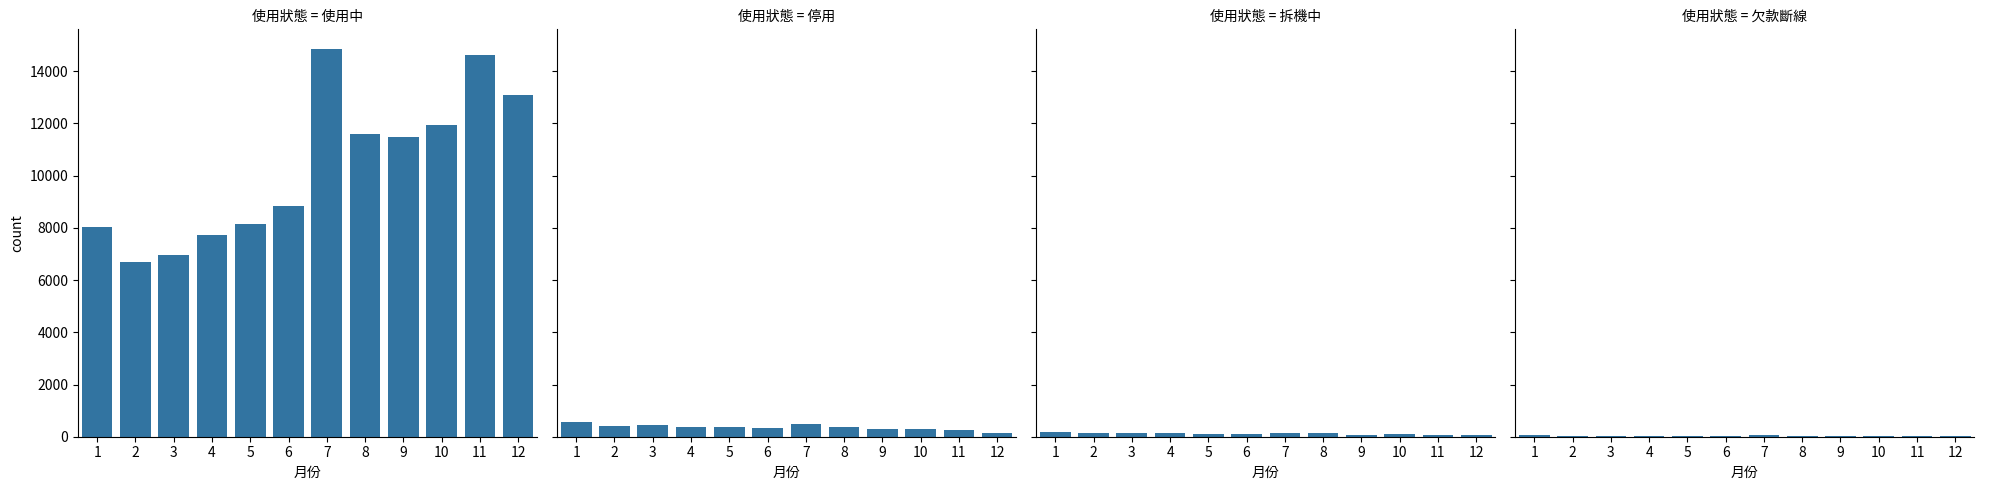

In [14]:
# 劃出依不同月分，各使用狀態的數量分布值
# sns.catplot(x='月份', col='使用狀態', data=ds_doService, kind='count')
# 篩選出工單日期年份為 2024 年的資料
filtered_data = ds_doService[pd.to_datetime(ds_doService['工單日期']).dt.year == 2024]

# 使用篩選後的資料繪製圖表
sns.catplot(x='月份', col='使用狀態', data=filtered_data, kind='count')

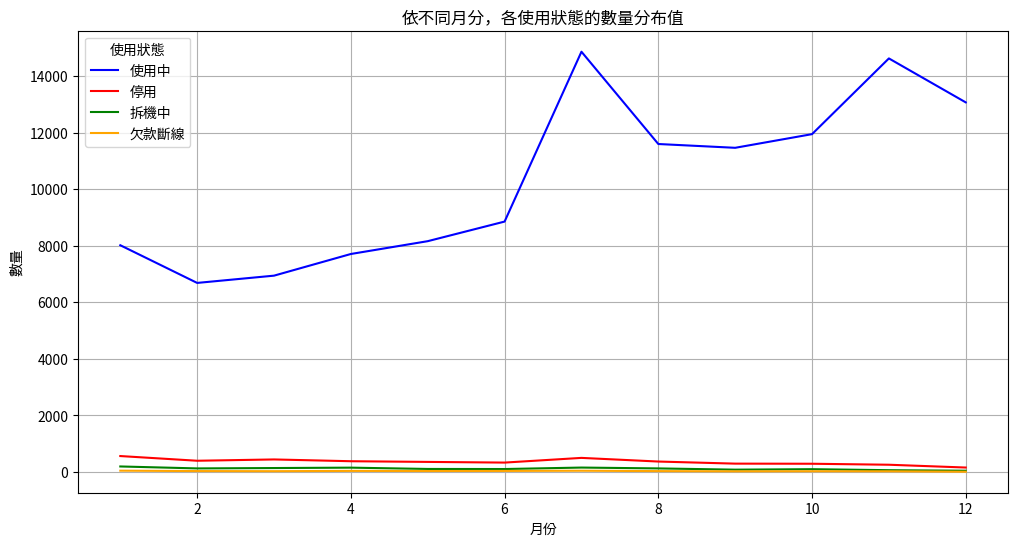

In [15]:
# 在同一畫布上，以四條不同顏色曲線，劃出ds_doService中依不同月分，各使用狀態的數量分布值
# 依照月份和使用狀態分組，並計算數量
status_by_month = filtered_data.groupby(['月份', '使用狀態']).size().reset_index(name='數量')

# 繪製折線圖
plt.figure(figsize=(12, 6))  # 調整圖表大小

sns.lineplot(x='月份', y='數量', hue='使用狀態', data=status_by_month,
             palette={'使用中': 'blue', '停用': 'red', '拆機中': 'green', '欠款斷線': 'orange'})

plt.title('依不同月分，各使用狀態的數量分布值')  # 設定圖表標題
plt.xlabel('月份')  # 設定 x 軸標籤
plt.ylabel('數量')  # 設定 y 軸標籤
plt.grid(True)  # 顯示格線

plt.show()  # 顯示圖表

<ipython-input-16-1baa9ef853bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (filtered_data['平均等待天數'],kde = False,bins = 30)


<Axes: xlabel='平均等待天數'>

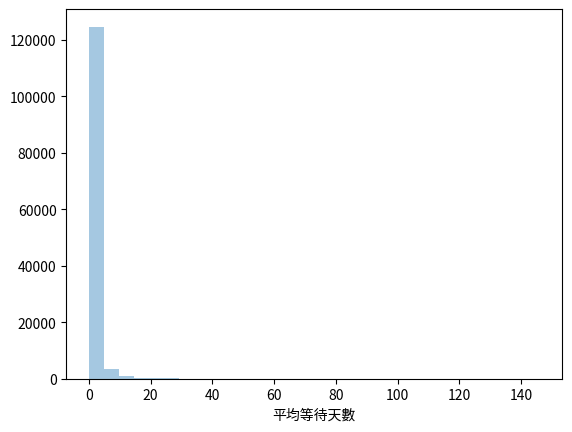

In [16]:
sns.distplot (filtered_data['平均等待天數'],kde = False,bins = 30)

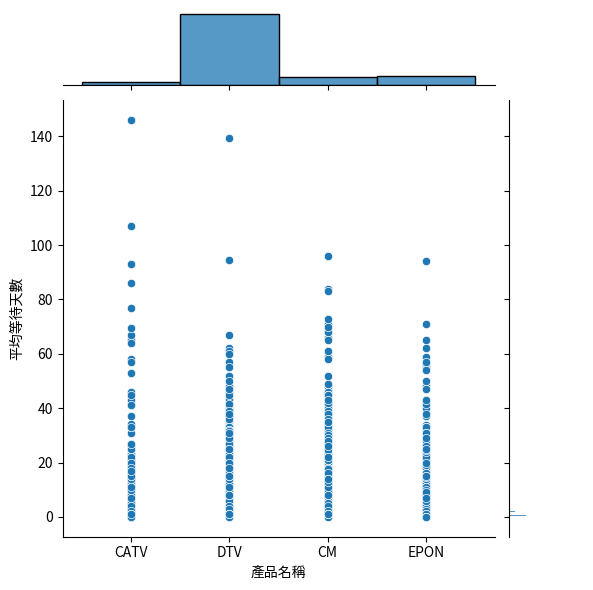

In [17]:
sns.jointplot(x= '產品名稱',y='平均等待天數',data=filtered_data,kind='scatter')

In [18]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130154 entries, 1 to 300609
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   客編      130154 non-null  int64  
 1   相關編號    130154 non-null  int64  
 2   工單日期    130154 non-null  object 
 3   30天內    130154 non-null  int64  
 4   60天內    130154 non-null  int64  
 5   90天內    130154 non-null  int64  
 6   90天以上   130154 non-null  int64  
 7   平均等待天數  130154 non-null  float64
 8   產品名稱    130154 non-null  object 
 9   用戶種類    130154 non-null  object 
 10  起日      130154 non-null  object 
 11  迄日      4154 non-null    object 
 12  系統台     130154 non-null  object 
 13  地區      130154 non-null  object 
 14  繳別      130154 non-null  int64  
 15  使用狀態    130154 non-null  object 
 16  月份      130154 non-null  int32  
dtypes: float64(1), int32(1), int64(7), object(8)
memory usage: 17.4+ MB


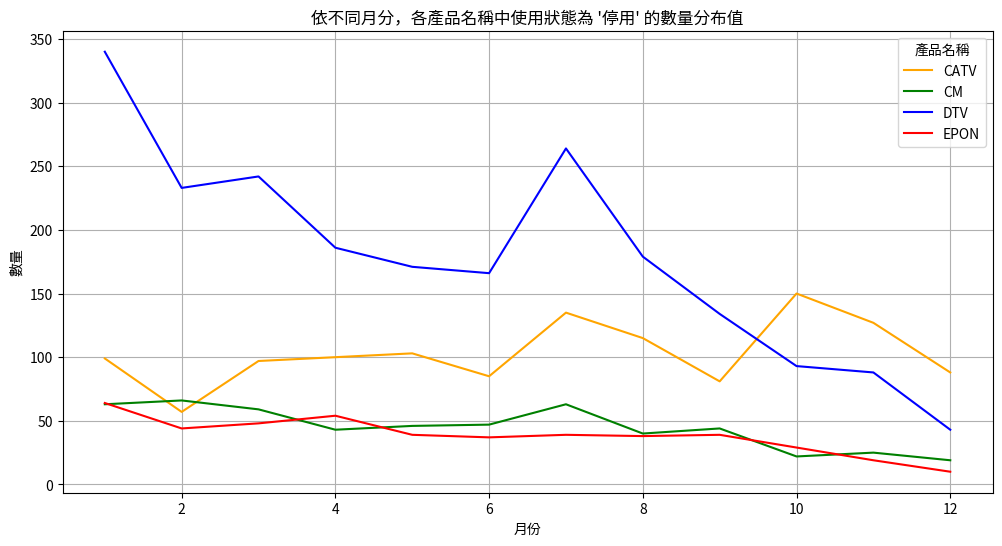

In [19]:
# 在同一畫布上，以四條不同顏色曲線，劃出ds_doService中依不同月分，各產品名稱中使用狀態為 '停用' 的數量分布值
# 篩選出使用狀態為 '停用' 的資料
filtered_stopService = filtered_data[filtered_data['使用狀態'] == '停用']
# 依照月份和產品名稱分組，並計算數量
product_by_month = filtered_stopService.groupby(['月份', '產品名稱']).size().reset_index(name='數量')

# 繪製折線圖
plt.figure(figsize=(12, 6))  # 調整圖表大小

sns.lineplot(x='月份', y='數量', hue='產品名稱', data=product_by_month,
             palette={'DTV': 'blue', 'EPON': 'red', 'CM': 'green', 'CATV': 'orange'})

plt.title('依不同月分，各產品名稱中使用狀態為 \'停用\' 的數量分布值')  # 設定圖表標題
plt.xlabel('月份')  # 設定 x 軸標籤
plt.ylabel('數量')  # 設定 y 軸標籤
plt.grid(True)  # 顯示格線

plt.show()  # 顯示圖表

<Axes: xlabel='產品名稱', ylabel='平均等待天數'>

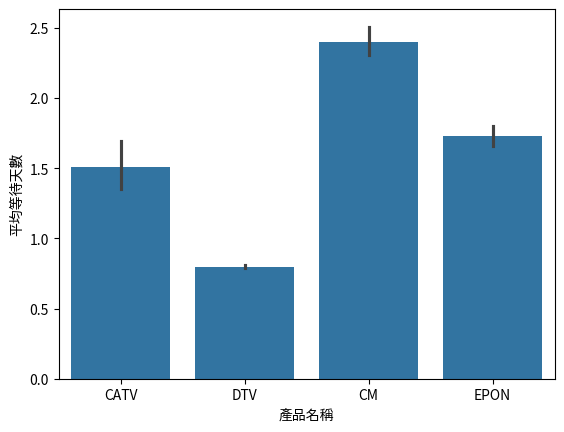

In [20]:
sns.barplot(x='產品名稱',y='平均等待天數',data=filtered_data)

<Axes: xlabel='產品名稱', ylabel='平均等待天數'>

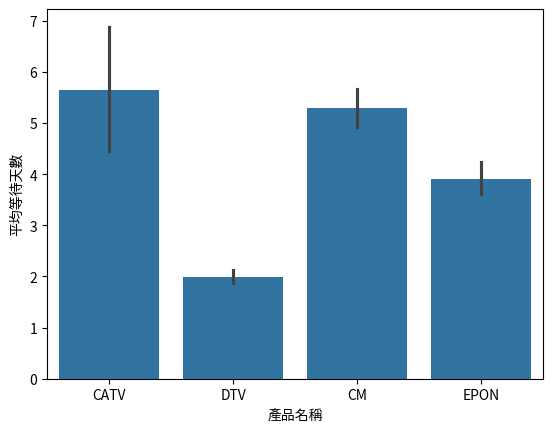

In [21]:
sns.barplot(x='產品名稱',y='平均等待天數',data=filtered_data,estimator=np.std)

<ipython-input-22-aa50d0e70959>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = '月份', y = '平均等待天數', data=filtered_data, palette='rainbow')


<Axes: xlabel='月份', ylabel='平均等待天數'>

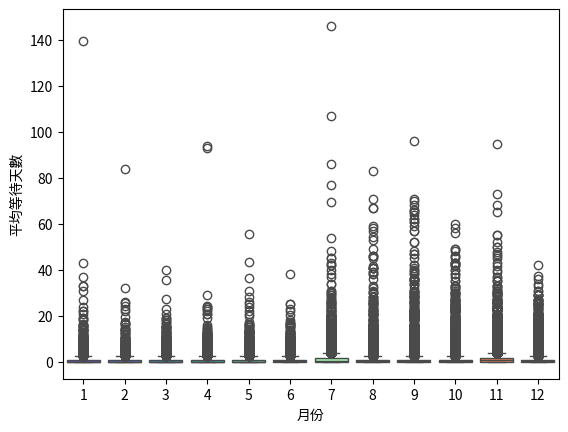

In [22]:
sns.boxplot(x = '月份', y = '平均等待天數', data=filtered_data, palette='rainbow')

In [23]:
# ds_doService 中使用狀態之值為 '拆機中'或'欠款斷線' 者，將其值改為 '停用'後存入 ds_biService 資料集
# Create a copy of ds_doService to avoid modifying the original DataFrame
ds_biService = filtered_data.copy()

# Replace '拆機中' and '欠款斷線' with '停用' in the '使用狀態' column
ds_biService.loc[ds_biService['使用狀態'].isin(['拆機中', '欠款斷線']), '使用狀態'] = '停用'

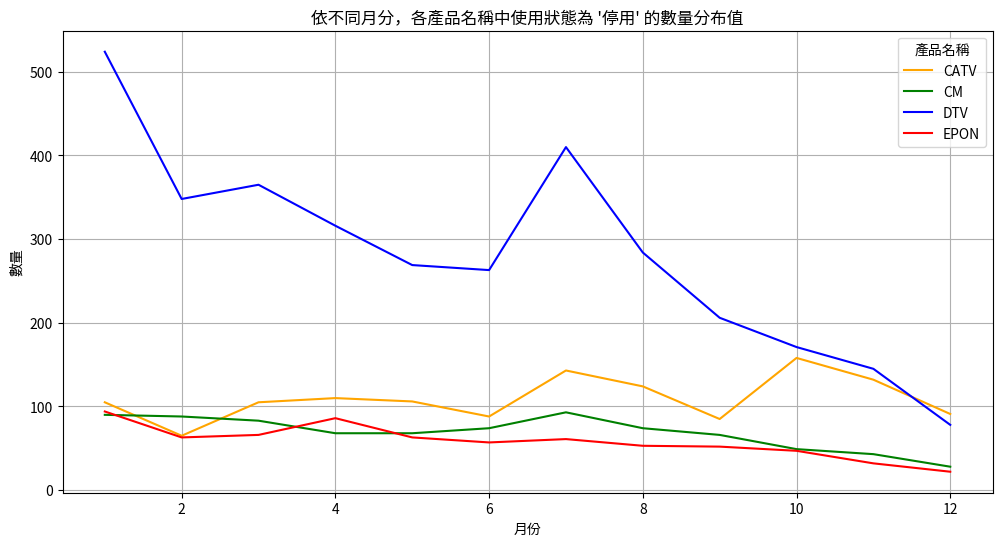

In [24]:
# 在同一畫布上，以四條不同顏色曲線，劃出ds_doService中依不同月分，各產品名稱中使用狀態為 '停用' 的數量分布值
# 篩選出使用狀態為 '停用' 的資料
filtered_stopService = ds_biService[ds_biService['使用狀態'] == '停用']
# 依照月份和產品名稱分組，並計算數量
product_by_month = filtered_stopService.groupby(['月份', '產品名稱']).size().reset_index(name='數量')

# 繪製折線圖
plt.figure(figsize=(12, 6))  # 調整圖表大小

sns.lineplot(x='月份', y='數量', hue='產品名稱', data=product_by_month,
             palette={'DTV': 'blue', 'EPON': 'red', 'CM': 'green', 'CATV': 'orange'})

plt.title('依不同月分，各產品名稱中使用狀態為 \'停用\' 的數量分布值')  # 設定圖表標題
plt.xlabel('月份')  # 設定 x 軸標籤
plt.ylabel('數量')  # 設定 y 軸標籤
plt.grid(True)  # 顯示格線

plt.show()  # 顯示圖表

<Axes: xlabel='產品名稱', ylabel='平均等待天數'>

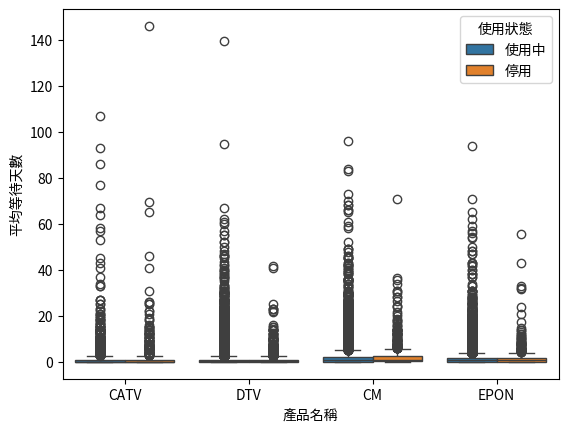

In [25]:
sns.boxplot(x='產品名稱', y='平均等待天數', hue='使用狀態', data=ds_biService)

In [26]:
# 針對ds_biService 中之工單日期欄位與起日欄位，比較其月份差距，並更新到 duration 欄位
ds_biService['工單日期'] = pd.to_datetime(ds_biService['工單日期'])
ds_biService['起日'] = pd.to_datetime(ds_biService['起日'])

ds_biService['duration'] = (ds_biService['工單日期'].dt.year - ds_biService['起日'].dt.year) * 12 + (ds_biService['工單日期'].dt.month - ds_biService['起日'].dt.month)

<Axes: xlabel='產品名稱', ylabel='duration'>

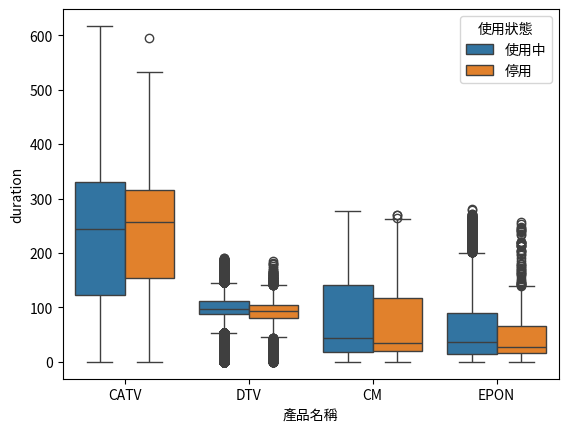

In [27]:
sns.boxplot(x='產品名稱', y='duration', hue='使用狀態', data=ds_biService)

<ipython-input-28-fac1ae298a9b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds_biService['duration'], kde=False, bins=30)


<Axes: xlabel='duration'>

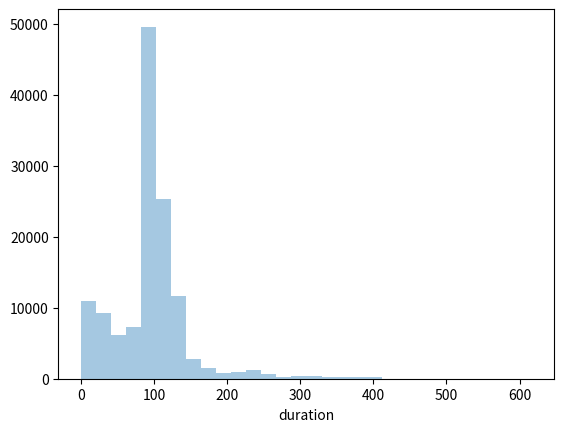

In [28]:
# 畫出 duration 的分布情形
sns.distplot(ds_biService['duration'], kde=False, bins=30)

<Axes: xlabel='產品名稱', ylabel='平均等待天數'>

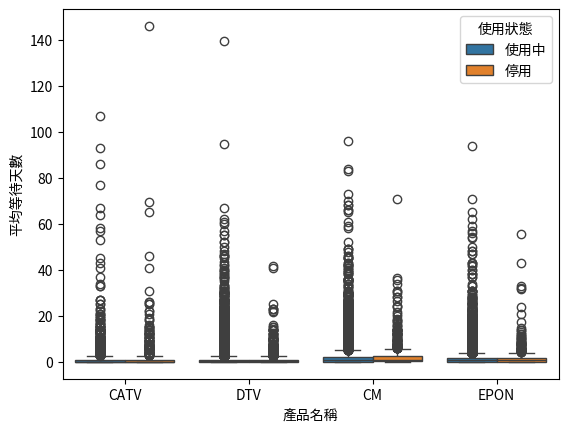

In [29]:
sns.boxplot(x='產品名稱', y='平均等待天數', hue='使用狀態', data=ds_biService)

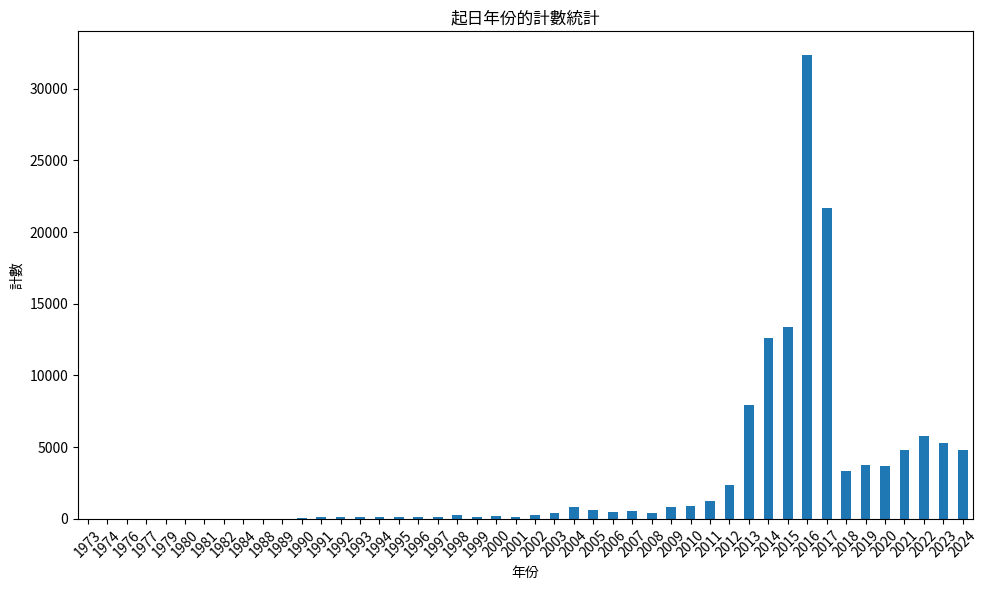

In [30]:
# 畫出ds_biService 中'起日'欄位所屬年份在不同年份的計數統計
ds_biService['起日年份'] = pd.to_datetime(ds_biService['起日']).dt.year
year_counts = ds_biService['起日年份'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('起日年份的計數統計')
plt.xlabel('年份')
plt.ylabel('計數')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
ds_biService.head()

,客編,相關編號,工單日期,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,起日,迄日,系統台,地區,繳別,使用狀態,月份,duration,起日年份
1,13,19,2024-08-13 21:53:11,1,0,0,1,0.0,CATV,一般收視戶,2001-11-19,NaN,大屯,大里區,6,使用中,8,273,2001
7,155,214,2024-11-20 18:53:44,1,0,0,2,0.0,CATV,一般收視戶,1998-10-01,1999/04/30 00:00:00,大屯,大里區,12,使用中,11,313,1998
9,207,284,2024-05-30 19:51:18,1,0,0,0,0.0,CATV,一般收視戶,2001-10-15,NaN,大屯,大里區,12,使用中,5,271,2001
10,223,303,2024-11-15 09:19:37,1,0,0,0,0.0,CATV,一般收視戶,1998-10-01,1999/04/30 00:00:00,大屯,大里區,6,停用,11,313,1998
11,270,364,2024-11-26 12:30:39,1,0,0,0,0.0,CATV,一般收視戶,1998-08-11,1998/11/30 00:00:00,大屯,太平區,1,停用,11,315,1998


In [32]:
ds_stopService = ds_biService[ds_biService['使用狀態'] == '停用']

In [33]:
print(ds_stopService['30天內'].value_counts())
print(ds_stopService['60天內'].value_counts())
print(ds_stopService['90天內'].value_counts())

30天內
1    5730
2     430
3      42
4       8
5       1
Name: count, dtype: int64
60天內
0    5934
1     246
2      25
3       5
4       1
Name: count, dtype: int64
90天內
0    5968
1     214
2      26
3       3
Name: count, dtype: int64


In [36]:
# Filter the DataFrame to select rows where columns are greater than 0
filtered_ds_stopService = ds_stopService[
    (ds_stopService['30天內'] > 1) &
    (ds_stopService['60天內'] > 1)
]

# Get the number of rows in the filtered DataFrame
num_rows = len(filtered_ds_stopService)

# Print the result
print(f"Number of rows where '30天內' and '60天內' are both greater than 0: {num_rows}")

Number of rows where '30天內' and '60天內' are both greater than 0: 5


In [37]:
ds_stillService = ds_biService[ds_biService['使用狀態'] != '停用']

In [38]:
print(ds_stillService['30天內'].value_counts())
print(ds_stillService['60天內'].value_counts())
print(ds_stillService['90天內'].value_counts())

30天內
1    114090
2      8771
3       948
4       112
5        20
6         1
7         1
Name: count, dtype: int64
60天內
0    117591
1      5768
2       504
3        70
4         7
5         3
Name: count, dtype: int64
90天內
0    118170
1      5317
2       412
3        35
4         8
5         1
Name: count, dtype: int64


In [39]:
# Filter the DataFrame to select rows where columns are greater than 0
filtered_ds_stillService = ds_stillService[
    (ds_stillService['30天內'] > 1) &
    (ds_stillService['60天內'] > 1)
]

# Get the number of rows in the filtered DataFrame
num_rows = len(filtered_ds_stillService)

# Print the result
print(f"Number of rows where '30天內' and '60天內' are both greater than 0: {num_rows}")

Number of rows where '30天內' and '60天內' are both greater than 0: 139


In [40]:
ds_stopService[['30天內', '60天內', '90天內']].mean()

,0
30天內,1.087265
60天內,0.050716
90天內,0.044276


In [41]:
ds_stillService[['30天內', '60天內', '90天內']].mean()

,0
30天內,1.089509
60天內,0.056712
90天內,0.050693


In [42]:
# 只留下產品名稱為 'CM' 及 'EPON'
ds_stopService = ds_stopService[ds_stopService['產品名稱'].isin(['CM', 'EPON'])]
ds_stillService = ds_stillService[ds_stillService['產品名稱'].isin(['CM', 'EPON'])]
ds_biService = ds_biService[ds_biService['產品名稱'].isin(['CM', 'EPON'])]

In [43]:
print(ds_stopService[['30天內', '60天內', '90天內']].mean())
print(ds_stillService[['30天內', '60天內', '90天內']].mean())

30天內    1.166447
60天內    0.081579
90天內    0.071711
dtype: float64
30天內    1.131881
60天內    0.072279
90天內    0.057706
dtype: float64


          使用狀態_數值      30天內      60天內      90天內     90天以上
使用狀態_數值  1.000000  0.021295  0.007596  0.013032  0.017927
30天內     0.021295  1.000000  0.084382  0.046698  0.091533
60天內     0.007596  0.084382  1.000000  0.087549  0.104034
90天內     0.013032  0.046698  0.087549  1.000000  0.112494
90天以上    0.017927  0.091533  0.104034  0.112494  1.000000


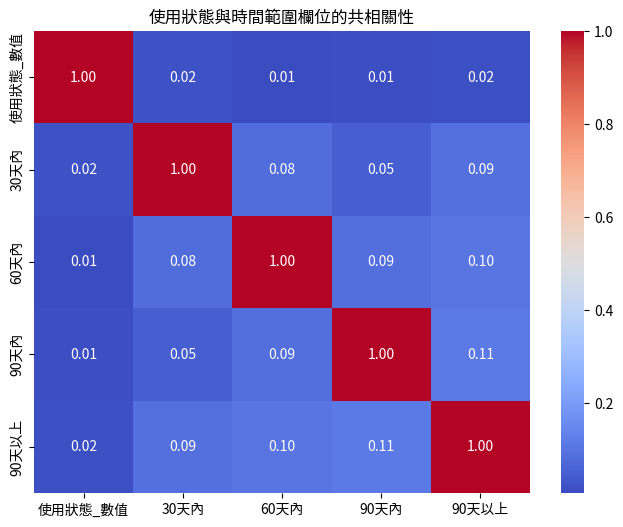

In [44]:
# 分析ds_biService 中使用狀態欄位與 '30天內' 、'60天內' 、'90天內'、 '90天以上' 等四個欄位的共相關性
# 步驟 1： 將使用狀態欄位轉換為數值表示
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ds_biService['使用狀態_數值'] = le.fit_transform(ds_biService['使用狀態'])

# 步驟 2： 選擇相關欄位並計算共相關性
selected_columns = ['使用狀態_數值', '30天內', '60天內', '90天內', '90天以上']
correlation_matrix = ds_biService[selected_columns].corr()
print(correlation_matrix)

# 步驟 3： 可視化共相關性矩陣 (可選)
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('使用狀態與時間範圍欄位的共相關性')
plt.show()

In [45]:
print(ds_biService['30天內'].value_counts())
print(ds_biService['60天內'].value_counts())
print(ds_biService['90天內'].value_counts())
print(ds_biService['90天以上'].value_counts())

30天內
1    20925
2     2412
3      289
4       46
5       12
Name: count, dtype: int64
60天內
0    22184
1     1310
2      158
3       28
4        4
Name: count, dtype: int64
90天內
0    22448
1     1098
2      126
3       10
4        2
Name: count, dtype: int64
90天以上
0     12323
1      5396
2      2640
3      1488
4       795
5       463
6       246
7       125
8        77
9        52
10       37
11       18
13        8
12        8
14        4
15        2
16        1
21        1
Name: count, dtype: int64


In [46]:
# 為每一個時間區段累加其派工次數
ds_biService['60天內'] = ds_biService['30天內'] + ds_biService['60天內']
ds_biService['90天內'] = ds_biService['30天內'] + ds_biService['60天內'] + ds_biService['90天內']
ds_biService['90天以上'] = ds_biService['30天內'] + ds_biService['60天內'] + ds_biService['90天內'] + ds_biService['90天以上']

          使用狀態_數值      30天內      60天內      90天內     90天以上    平均等待天數
使用狀態_數值  1.000000  0.021295  0.020750  0.024342  0.027642  0.010177
30天內     0.021295  1.000000  0.816699  0.895339  0.703277  0.029163
60天內     0.020750  0.816699  1.000000  0.930311  0.749164  0.051501
90天內     0.024342  0.895339  0.930311  1.000000  0.780849  0.050686
90天以上    0.027642  0.703277  0.749164  0.780849  1.000000  0.040248
平均等待天數   0.010177  0.029163  0.051501  0.050686  0.040248  1.000000


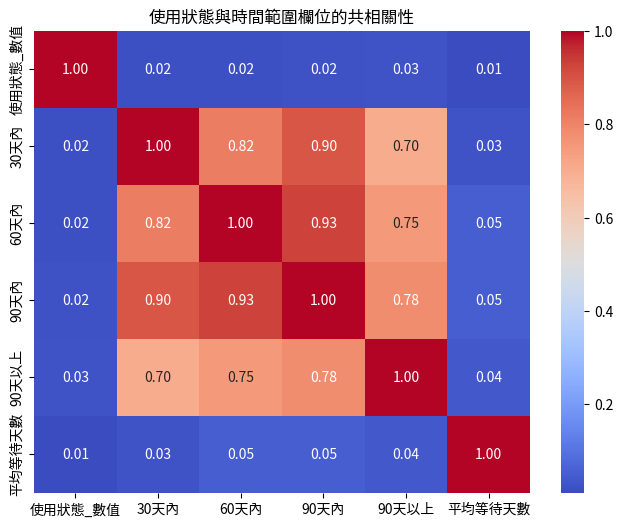

In [47]:
# 步驟 2： 選擇相關欄位並計算共相關性
selected_columns = ['使用狀態_數值', '30天內', '60天內', '90天內', '90天以上','平均等待天數']
correlation_matrix = ds_biService[selected_columns].corr()
print(correlation_matrix)

# 步驟 3： 可視化共相關性矩陣 (可選)
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('使用狀態與時間範圍欄位的共相關性')
plt.show()

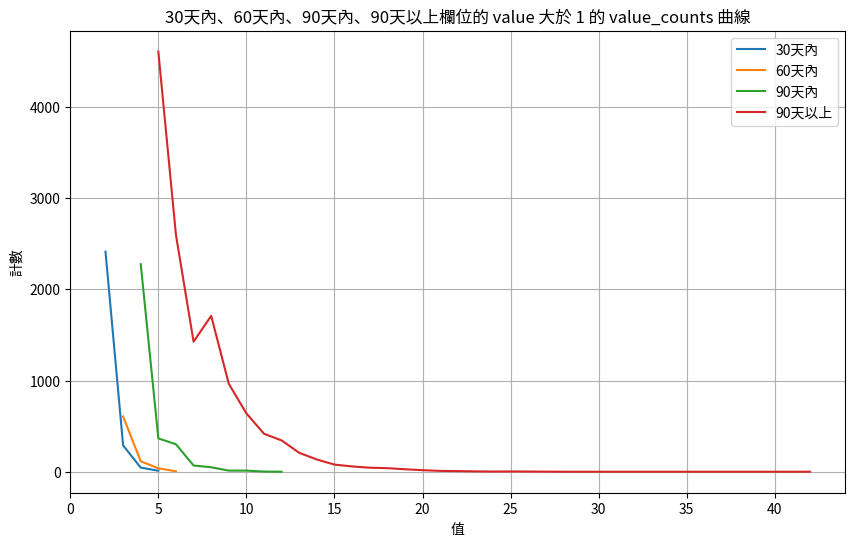

In [48]:
counts_30 = ds_biService['30天內'][ds_biService['30天內'] > 1].value_counts().sort_index()
counts_60 = ds_biService['60天內'][ds_biService['60天內'] > 2].value_counts().sort_index()
counts_90 = ds_biService['90天內'][ds_biService['90天內'] > 3].value_counts().sort_index()
counts_90_above = ds_biService['90天以上'][ds_biService['90天以上'] > 4].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.plot(counts_30.index, counts_30.values, label='30天內')
plt.plot(counts_60.index, counts_60.values, label='60天內')
plt.plot(counts_90.index, counts_90.values, label='90天內')
plt.plot(counts_90_above.index, counts_90_above.values, label='90天以上')

plt.title('30天內、60天內、90天內、90天以上欄位的 value 大於 1 的 value_counts 曲線')
plt.xlabel('值')
plt.ylabel('計數')
plt.legend()
plt.grid(True)

plt.show()

In [49]:
ds_biService.head()

,客編,相關編號,工單日期,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,起日,迄日,系統台,地區,繳別,使用狀態,月份,duration,起日年份,使用狀態_數值
10197,679626,753689,2024-04-20 15:46:51,1,1,2,5,0.000000,CM,一般收視戶,2002-02-07,2002/02/06 00:00:00,佳聯,虎尾鎮,1,使用中,4,266,2002,0
10199,679698,753768,2024-03-23 13:20:55,1,1,2,7,0.500000,EPON,一般收視戶,2004-03-06,2002/10/21 00:00:00,佳聯,土庫鎮,1,使用中,3,240,2004,0
10200,679710,753780,2024-12-28 13:10:36,1,1,2,5,1.500000,CM,一般收視戶,2002-02-22,2002/02/22 00:00:00,大屯,太平區,12,使用中,12,274,2002,0
10204,679818,753891,2024-10-27 17:09:01,1,1,2,5,0.000000,CM,一般收視戶,2003-06-26,2003/03/15 00:00:00,佳聯,斗六市,15,使用中,10,256,2003,0
10206,679881,753954,2024-09-19 15:00:12,1,1,2,6,1.333333,EPON,一般收視戶,2002-03-27,2002/03/18 00:00:00,大屯,大里區,6,使用中,9,270,2002,0


In [50]:
# 將 '工單日期' 欄位名稱改為  '最末工單日期'
ds_biService.rename(columns={'工單日期': '最末工單日期'}, inplace=True)

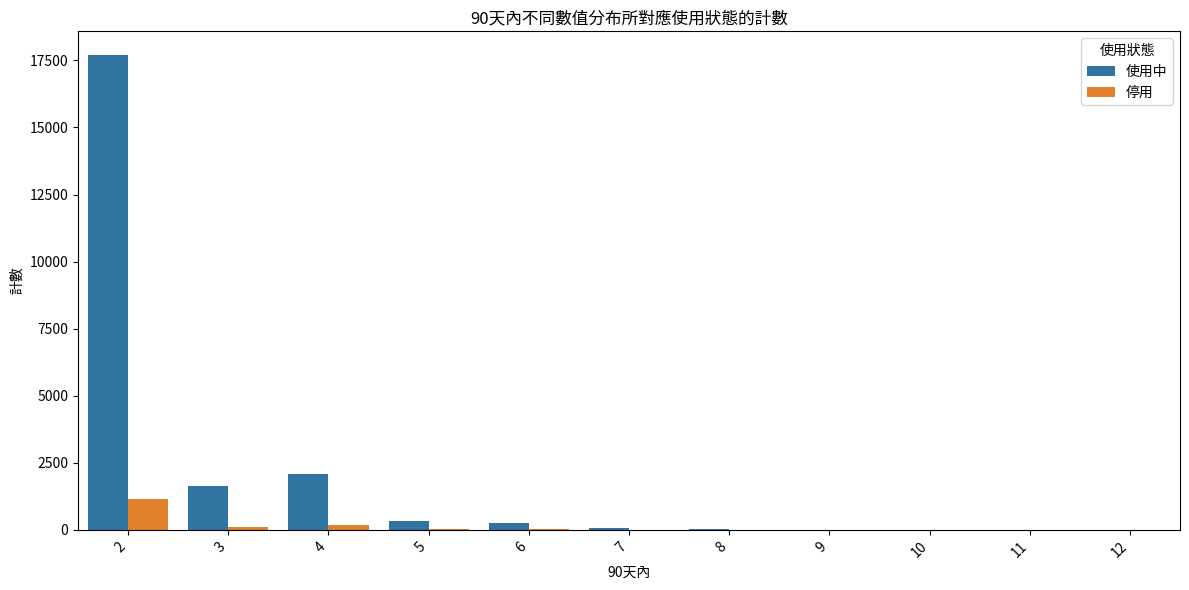

In [51]:
# 比較 '90天內' 不同數值分布所對應使用狀態的計數

status_counts_by_90days = ds_biService.groupby(['90天內', '使用狀態'])['使用狀態'].count().reset_index(name='計數')
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='90天內', y='計數', hue='使用狀態', data=status_counts_by_90days)
plt.title('90天內不同數值分布所對應使用狀態的計數')
plt.xlabel('90天內')
plt.ylabel('計數')
plt.xticks(rotation=45, ha='right')  # 旋轉 x 軸標籤以避免重疊
plt.tight_layout()  # 調整圖表布局以避免標籤被截斷
plt.show()

In [52]:
status_counts_by_90days.head()

,90天內,使用狀態,計數
0,2,使用中,17697
1,2,停用,1162
2,3,使用中,1621
3,3,停用,112
4,4,使用中,2096


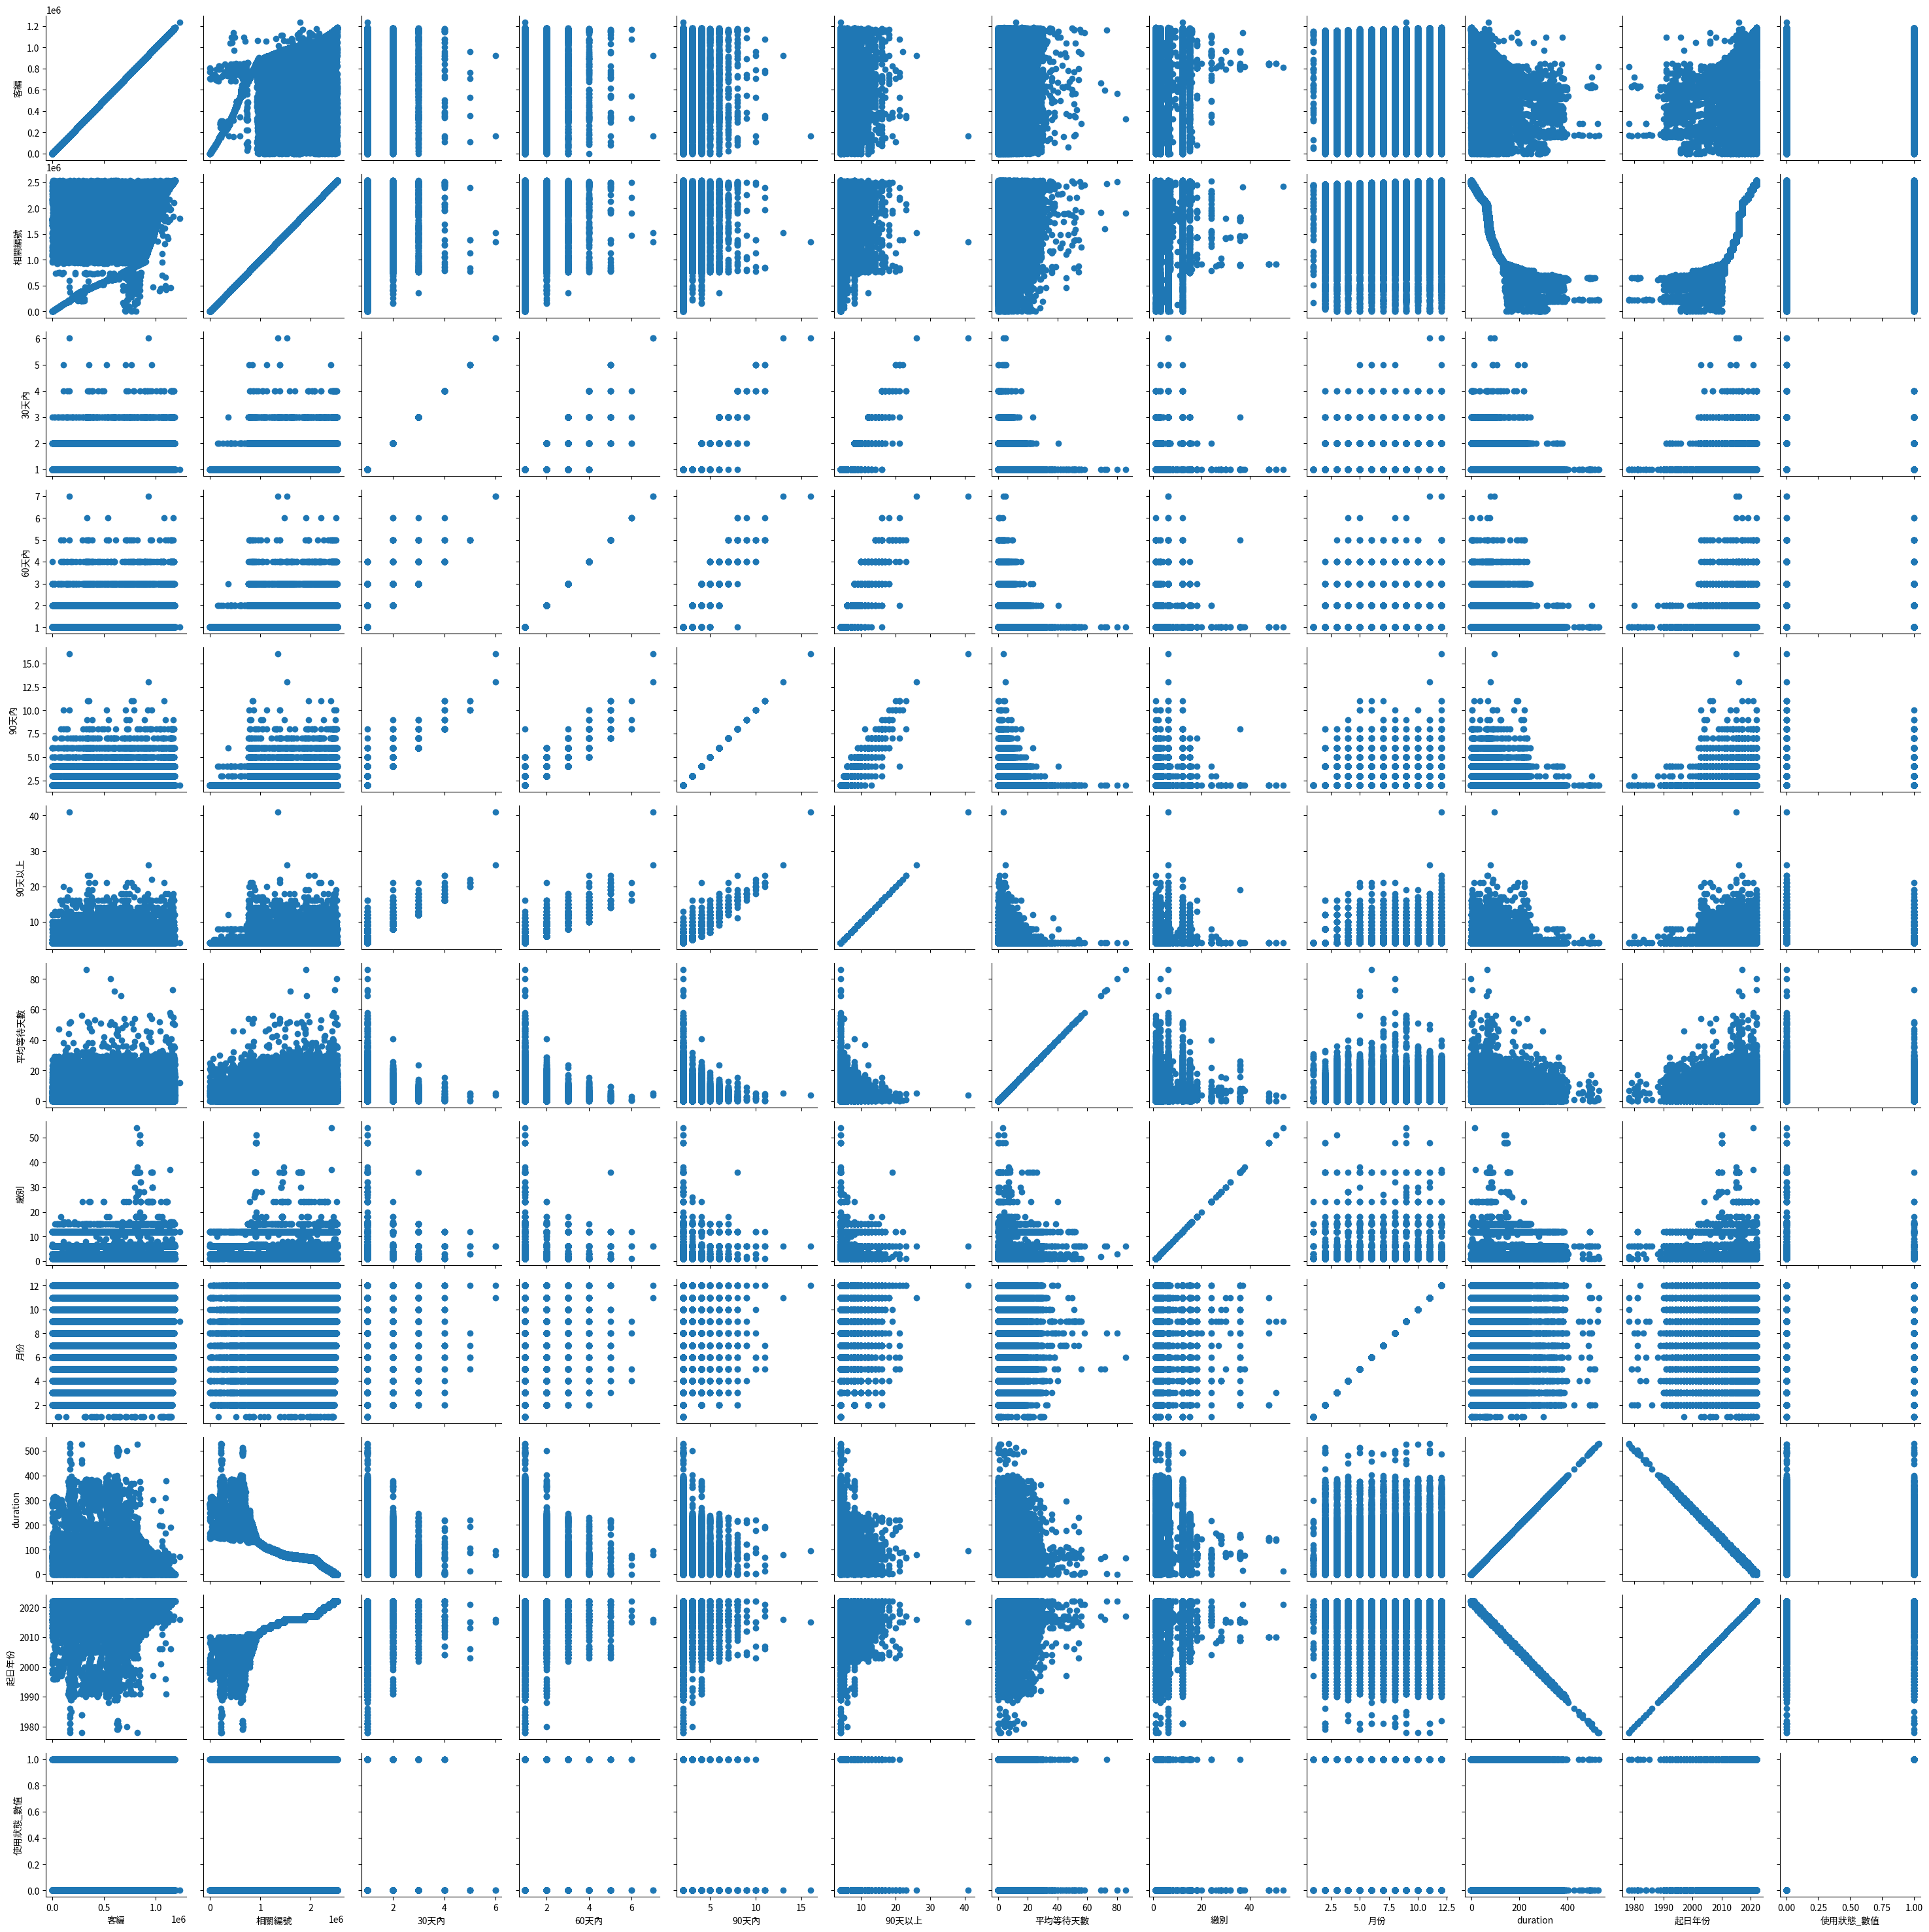

In [ ]:
g = sns.PairGrid(ds_biService)
g.map(plt.scatter)

In [53]:
# 畫出ds_biService 中'起日'欄位所屬年份在不同年份的計數統計
ds_biService['工單年份'] = pd.to_datetime(ds_biService['最末工單日期']).dt.year

In [54]:
ds_biService.head()

,客編,相關編號,最末工單日期,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,...,迄日,系統台,地區,繳別,使用狀態,月份,duration,起日年份,使用狀態_數值,工單年份
10197,679626,753689,2024-04-20 15:46:51,1,1,2,5,0.000000,CM,一般收視戶,...,2002/02/06 00:00:00,佳聯,虎尾鎮,1,使用中,4,266,2002,0,2024
10199,679698,753768,2024-03-23 13:20:55,1,1,2,7,0.500000,EPON,一般收視戶,...,2002/10/21 00:00:00,佳聯,土庫鎮,1,使用中,3,240,2004,0,2024
10200,679710,753780,2024-12-28 13:10:36,1,1,2,5,1.500000,CM,一般收視戶,...,2002/02/22 00:00:00,大屯,太平區,12,使用中,12,274,2002,0,2024
10204,679818,753891,2024-10-27 17:09:01,1,1,2,5,0.000000,CM,一般收視戶,...,2003/03/15 00:00:00,佳聯,斗六市,15,使用中,10,256,2003,0,2024
10206,679881,753954,2024-09-19 15:00:12,1,1,2,6,1.333333,EPON,一般收視戶,...,2002/03/18 00:00:00,大屯,大里區,6,使用中,9,270,2002,0,2024
